# 這裡可做為測試使用，請隨意修改

In [33]:
from functions.Particles import Particles
import scipy.constants as const

In [34]:
N=10
x=Particles(N)
print(x.pos)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [35]:
air_mass=const.physical_constants['alpha particle mass'][0]*7
print(air_mass)

4.65126013499e-26


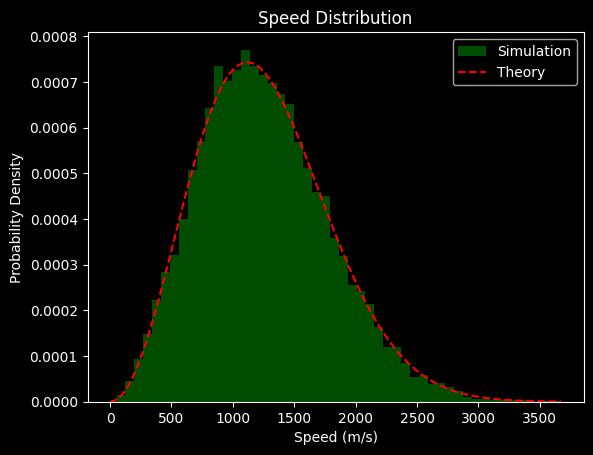

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell
import gc

def generate_initial_velocities_2d(N, temperature, mass):
    # 使用 maxwell.rvs() 生成速度向量
    speeds = np.zeros((N, 2))
    vel = maxwell.rvs(scale=np.sqrt(k*temperature / mass), size=(N))
    theta = np.random.uniform(0, 2*np.pi, N) #random angle
    speeds[:,0] = vel[:]*np.cos(theta)
    speeds[:,1] = vel[:]*np.sin(theta)
    return speeds
gc.collect()
# 參數設定
k=const.Boltzmann
N_particles = 10000 # 粒子數量
temperature = 300  # 溫度 (K)
mass = 4 * 1.66054e-27  # Alpha粒子的質量 (kg)，假設為4個中子和質子的總質量

# 生成初始速度向量
initial_velocities_2d = generate_initial_velocities_2d(N_particles, temperature, mass)

# 計算速度大小
#speeds_magnitude=np.sqrt(initial_velocities_2d[:,0]**2+initial_velocities_2d[:,1]**2)
speeds_magnitude = np.linalg.norm(initial_velocities_2d, axis=1)

# 繪製速度大小與對應數量的關係圖
plt.hist(speeds_magnitude, bins=50, alpha=0.6, color='g', density=True, label='Simulation')

# 計算理論上的波茲曼速度分布
speeds_range = np.linspace(0, np.max(speeds_magnitude), 100)
theory_distribution = maxwell.pdf(speeds_range, scale=np.sqrt(k*temperature / mass))
plt.plot(speeds_range, theory_distribution, 'r--', label='Theory')

plt.title('Speed Distribution')
plt.xlabel('Speed (m/s)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


In [37]:
from scipy.stats import gaussian_kde
import numpy as np
# 产生和处理数据，初始化KDE
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 在通用的网格中计算得到Z的值
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 将图表绘制成一张图像
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

Error in callback <function flush_figures at 0x00000249396EADD0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell

def generate_initial_velocities_2d(N, temperature, mass):
    # 使用 maxwell.rvs() 生成速度向量
    speeds = maxwell.rvs(scale=np.sqrt(temperature / mass), size=(N, 2))
    return speeds

# 參數設定
N_particles = 1000  # 粒子數量
temperature = 300  # 溫度 (K)
mass = 4 * 1.66054e-27  # Alpha粒子的質量 (kg)，假設為4個中子和質子的總質量

# 生成初始速度向量
initial_velocities_2d = generate_initial_velocities_2d(N_particles, temperature, mass)

# 計算速度大小
speeds_magnitude = np.linalg.norm(initial_velocities_2d, axis=1)

# 繪製速度大小與對應數量的關係圖
plt.hist(speeds_magnitude, bins=50, alpha=0.6, color='g')
plt.title('Speed Distribution')
plt.xlabel('Speed (m/s)')
plt.ylabel('Number of Particles')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 生成随机数据作为示例
data = np.random.rand(10000, 3)  # 100个数据点，每个数据点有3个维度的值

# 分别取出 x, y, z 值
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# 绘制 hexbin 图
plt.hexbin(x, y, C=z, gridsize=100, cmap='viridis')  # gridsize 控制网格的大小，cmap 指定色图
plt.colorbar(label='Z Axis')  # 添加颜色条
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Hexbin Plot with Color by Z Axis')
plt.show()

In [ ]:
import numpy as np

from functions.Particles import Particles
from functions.DataProcesser import DataProcesser
from functions.Environment import Environment
from functions.Simulators import Simulators


particles_number=1000
particles=Particles(particles_number)
particles.set_particles()
# 生成随机数据作为示例
data = np.random.rand(100, 3)  # 100个数据点，每个数据点有3个维度的值

# 分别取出 x, y, z 值
z=np.linalg.norm(particles.vel, axis=1)**2*particles.mass/(3*const.Boltzmann)
x = particles.pos[:, 0]
y = particles.pos[:, 1]

# 计算 KDE
kde = gaussian_kde([x, y])

# 生成网格点
x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
z_grid = kde(np.vstack([x_grid.ravel(), y_grid.ravel()]))

# 绘制等高线图
plt.contourf(x_grid, y_grid, z_grid.reshape(x_grid.shape), cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Contour Plot with KDE')
plt.show()

In [ ]:
import numba as nb
@nb.njit(parallel=True)
def determine_z_value(xbins,ybins,x,y,z_values):
    # Calculate bin centers
    xcenters = (xbins[:-1] + xbins[1:]) / 2
    ycenters = (ybins[:-1] + ybins[1:]) / 2
    # Initialize an array to store the mean values
    mean_values = np.zeros((len(xcenters), len(ycenters)))

    for i in range(len(xcenters)):
        for j in range(len(ycenters)):
            x_in_bin = (x >= xbins[i]) & (x < xbins[i+1])
            y_in_bin = (y >= ybins[j]) & (y < ybins[j+1])
            points_in_bin = x_in_bin & y_in_bin
            if np.sum(points_in_bin) > 0:
                mean_values[i, j] = np.mean(z_values[points_in_bin])
    return mean_values

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined 'particles' and 'const' somewhere in your code
particles_number=100000
particles=Particles(particles_number)
particles.set_particles(pos_type='uniform',vel_type='Boltzmann',room_size=[0,50,0,50],T=300,particle_type='air')
# Extract x, y positions from particles
x = particles.pos[:, 0]
y = particles.pos[:, 1]

# Assuming you have a third dimension 'z_values'
z_values = np.linalg.norm(particles.vel, axis=1)**2*particles.mass/(3*const.Boltzmann)

# Define resolution and room size
resolution = 200  # Example resolution
xmin, xmax, ymin, ymax = particles.room_size

# Calculate bin edges
xbins = np.linspace(xmin, xmax, resolution)
ybins = np.linspace(ymin, ymax, resolution)



# Loop through each bin and calculate the mean value of z_values within that bin
mean_values=determine_z_value(xbins,ybins,x,y,z_values)

tt=np.mean(z_values)
print('T=',tt)
# Plot the 2D histogram with mean values
plt.imshow(mean_values.T, extent=(xmin, xmax, ymin, ymax), cmap='turbo', origin='lower')
plt.colorbar(label='Mean Z Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('2D Histogram with Mean Z Values')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Smooth the data using a Gaussian filter
smoothed_mean_values = gaussian_filter(mean_values, sigma=5)

tt = np.mean(z_values)
print('T=', tt)

# Plot the 2D histogram with mean values
plt.imshow(smoothed_mean_values.T, extent=(xmin, xmax, ymin, ymax), cmap='jet',vmin=0,vmax=1000, origin='lower')
plt.colorbar(label='Mean Z Values')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Smoothed 2D Histogram with Mean Z Values')
plt.show()

In [ ]:
from scipy.ndimage import gaussian_filter
x = particles.pos[:, 0]
y = particles.pos[:, 1]
H, xedges, yedges = np.histogram2d(x, y, bins=resolution)
smoothed_H = gaussian_filter(H, sigma=8)
plt.imshow(smoothed_H.T, extent=particles.room_size, cmap='gray', origin='lower')
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Smoothed 2D Histogram with Specified Resolution')
plt.show()


In [ ]:
i=range(5)
j=range(5)
ii,jj=np.meshgrid(i,j)

print(ii)
print(jj)
L=list(map(lambda x,y:x*y,ii,jj))
print(*L)
print(L[2][2])


In [ ]:

import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
import imageio
import os
def traverse_imgs(writer, images):
    # 遍历所有图片，并且让writer抓取视频帧
    for img in images:
        plt.imshow(img)
        writer.grab_frame()
        plt.pause(0.01)
        plt.clf()
 
if __name__ == '__main__':
    # 创建video writer, 设置好相应参数，fps
    metadata = dict(title='01', artist='Matplotlib',comment='depth prediiton')
    writer = FFMpegWriter(fps=10, metadata=metadata)
 
    # 读出自己的所有图片
    image_path = os.path.join(image_folder, image_file)
    image = imageio.imread(image_path)
    figure = plt.figure(figsize=(10.8, 7.2))
    plt.ion()                                   # 为了可以动态显示
    plt.tight_layout()                          # 尽量减少窗口的留白
    with writer.saving(figure, 'out.mp4', 100): 
        traverse_imgs(writer, images)


In [ ]:
import numpy as np
import matplotlib.animation as animation
import numpy as np
from functions.Particles import Particles
from functions.DataProcesser import DataProcesser
import time
import gc
from numba import set_num_threads
def output_movie(fns, resolution=100, sigma=5, filename='movie.mp4', fps=30, plot_func='plot_gas_temperature'):
    """
    This function will create a movie of the data.
    fns: list, the list of output files
    filename: string, the name of the output movie
    fps: int, the frame per second of the movie
    plot_func: string, the name of the plot function
    """
    fig = plt.figure()
    fig=DataProcesser.plot_gas_number_density([], resolution=resolution,sigma=sigma,fig_save=True)
    def init():
        # Do any necessary setup here
        return []
    def update(frame):
        fn = fns[frame]
        print('filepath=',fn)
        print('frame=',frame)
        particles = DataProcesser.data_input(fn)    
        fig=animation.set_data(particles)
        return fig, 
    ani = animation.FuncAnimation(fig, update, frames=len(fns), init_func=init)
    ani.save(filename, writer='ffmpeg', fps=fps)
    return

gc.collect()
nthreads = 2
set_num_threads(nthreads)
particles_number=10000
particles=Particles(particles_number)
particles.set_particles(pos_type='uniform',vel_type='Boltzmann',room_size=[0,50,0,50],T=300,molecular_weight=28.9)
start_time = time.time()
#DataProcesser.plot_velocity_distribution(particles.T, particles.mass, particles.vel)
#DataProcesser.plot_position_distribution(particles.pos,room_size=particles.room_size, Nsection=1)
#DataProcesser.plot_gas_number_density(particles, resolution=100,sigma=3,fig_save=True)
#DataProcesser.plot_gas_temperature(particles, resolution=100,vmin=280,vmax=320,sigma=7,fig_save=True)
# DataProcesser.data_output(particles,'data','particles')
particles=DataProcesser.data_input('../data/test_rotate_t0000.bin')
#DataProcesser.plot_velocity_distribution(particles.T, particles.mass, particles.vel)
End_time = time.time()
print('Time:',End_time-start_time)

fns=DataProcesser.load_files('test_rotate')
DataProcesser.output_movie(fns, resolution=100, sigma=1, filename="test_rotate.mp4", fps=1, plot_func="plot_gas_number_density")


[[ -0.42265058   0.65609885]
 [ -3.40914131  -0.5496263 ]
 [  4.41271769  -1.02799549]
 [ -4.67293485   3.34909943]
 [ -2.48983238   2.95020036]
 [ -2.54453833   1.91661159]
 [ -3.05218709   7.96053181]
 [  6.74889616   2.14327884]
 [  7.03314382   0.23857847]
 [  2.13282099   0.86818625]
 [ -9.80260017  11.63641188]
 [ -2.21149779  11.17966304]
 [  6.03985502   2.90895863]
 [  4.71191015  -1.55095508]
 [  0.91143638  10.0988419 ]
 [  0.38038132   0.33261728]
 [  0.30725508  -0.68798279]
 [  7.56848714   3.60705518]
 [ -2.88372938  -5.56863945]
 [ -4.72862372  -2.0158992 ]
 [ -6.94801023  -0.80238811]
 [ -4.45394026   4.18124703]
 [  1.26295543   4.44544039]
 [  1.13202308   5.93784524]
 [  9.14343465   5.37489107]
 [  3.64840003  -1.25942925]
 [  7.04167449   3.78865908]
 [ -2.75408844  -1.46494867]
 [  4.74144558  -4.88929481]
 [  0.10610753   8.12651143]
 [ -9.7107933    1.22005597]
 [ -2.83788654   4.60777356]
 [  2.99279517   3.19915083]
 [  2.30867079 -15.10809428]
 [  2.2615941 

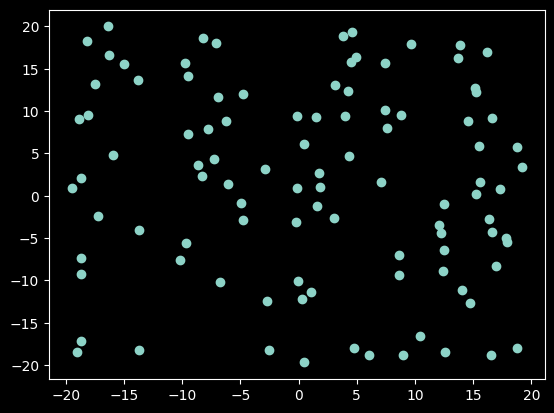

frame= 0
frame= 1
frame= 2
frame= 3
frame= 4
frame= 5
frame= 6
frame= 7
frame= 8
frame= 9
frame= 10
frame= 11
frame= 12
frame= 13
frame= 14
frame= 15
frame= 16
frame= 17
frame= 18
frame= 19
frame= 20
frame= 21
frame= 22
frame= 23
frame= 24
frame= 25
frame= 26
frame= 27
frame= 28
frame= 29
frame= 30
frame= 31
frame= 32
frame= 33
frame= 34
frame= 35
frame= 36
frame= 37
frame= 38
frame= 39
frame= 40
frame= 41
frame= 42
frame= 43
frame= 44
frame= 45
frame= 46
frame= 47
frame= 48
frame= 49
frame= 50
frame= 51
frame= 52
frame= 53
frame= 54
frame= 55
frame= 56
frame= 57
frame= 58
frame= 59
frame= 60
frame= 61
frame= 62
frame= 63
frame= 64
frame= 65
frame= 66
frame= 67
frame= 68
frame= 69
frame= 70
frame= 71
frame= 72
frame= 73
frame= 74
frame= 75
frame= 76
frame= 77
frame= 78
frame= 79
frame= 80
frame= 81
frame= 82
frame= 83
frame= 84
frame= 85
frame= 86
frame= 87
frame= 88
frame= 89
frame= 90
frame= 91
frame= 92
frame= 93
frame= 94
frame= 95
frame= 96
frame= 97
frame= 98
frame= 99
frame= 100

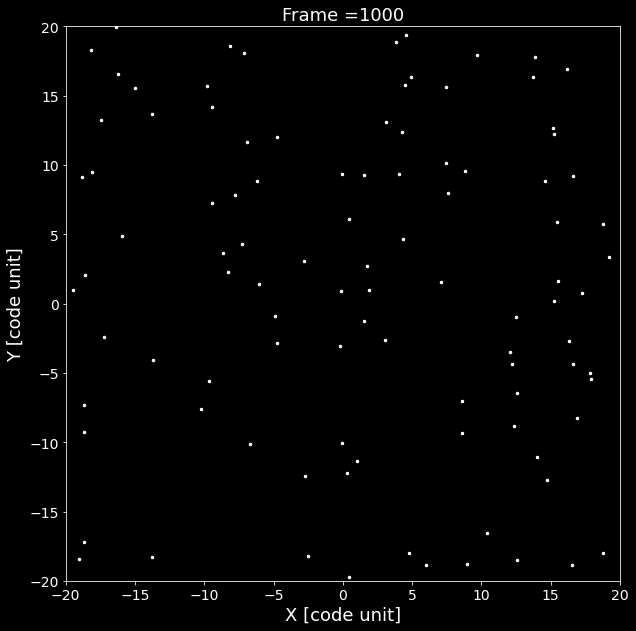

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numba as nb
nthreads = 16
nb.set_num_threads(nthreads)
@nb.njit
def collision(pos, vel, nparticles, critical_distance: float):
    """
    This function will calculate the next step of the simulation with collision.
    """
    for i in range(nparticles):
        for j in range(i + 1, nparticles):
            dist = np.linalg.norm(pos[i] - pos[j])
            if dist < 2 * critical_distance:
                pos_i, vel_i = pos[i], vel[i]
                pos_j, vel_j = pos[j], vel[j]
                r_ij, v_ij = pos_i - pos_j, vel_i - vel_j
                r_dot_r = r_ij @ r_ij
                v_dot_r = v_ij @ r_ij
                Jn = -v_dot_r * r_ij / r_dot_r
                vel[i] += Jn
                vel[j] -= Jn
    return vel

@nb.njit
def wall_collision(pos, vel, lengthscale):
    """
    This function will handle the collisions with the walls.
    """
    for i in range(len(pos)):
        if pos[i, 0] <= -lengthscale or pos[i, 0] >= lengthscale:
            vel[i, 0] = -vel[i, 0]
        if pos[i, 1] <= -lengthscale or pos[i, 1] >= lengthscale:
            vel[i, 1] = -vel[i, 1]
    return vel

def save_movie(xt, lengthscale=1.0, filename='movie.mp4', fps=30):
    plt.style.use('dark_background')
    scale = lengthscale

    fig, ax = plt.subplots()
    fig.set_linewidth(5)
    fig.set_size_inches(10, 10, forward=True)
    fig.set_dpi(72)
    line, = ax.plot([], [], '.', color='w', markersize=5)

    def init():
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        ax.set_xlim(-scale, scale)
        ax.set_ylim(-scale, scale)
        ax.set_aspect('equal')
        ax.set_xlabel('X [code unit]', fontsize=18)
        ax.set_ylabel('Y [code unit]', fontsize=18)
        return line, 

    def update(frame):
        line.set_data(xt[frame][:, 0], xt[frame][:, 1])
        plt.title("Frame =" + str(frame), size=18)
        print('frame=',frame)
        return line,

    ani = animation.FuncAnimation(fig, update, frames=len(xt), init_func=init, blit=True)
    ani.save(filename, writer='ffmpeg', fps=fps)
    return

nparticles = 100
time = 10
dt = 0.01
critical_distance = 0.05
lengthscale = 20
timesteps = int(time / dt)

pos = np.zeros((nparticles, 2))
vel = np.zeros((nparticles, 2))

# Initializing positions and velocities
pos[:, 0] = np.random.normal(0, 0.5, nparticles) * 10
pos[:, 1] = np.random.normal(0, 0.5, nparticles) * 10
vel[:, 0] = np.random.normal(0, 0.5, nparticles) * 10
vel[:, 1] = np.random.normal(0, 0.5, nparticles) * 10

print(pos, vel)
print(pos.shape, vel.shape)

xt = [pos.copy()]

for t in range(timesteps):
    pos += vel * dt
    vel = collision(pos, vel, nparticles, critical_distance=critical_distance)
    vel = wall_collision(pos, vel, lengthscale)
    xt.append(pos.copy())

plt.scatter(pos[:, 0], pos[:, 1])
plt.show()

save_movie(xt, lengthscale=lengthscale, filename='movie.mp4', fps=40)
